Audio file imported as an AudioIOTensor; we need to convert it to tf.Tensor() object

In [4]:
import tensorflow as tf
import tensorflow_io as tfio
audio = tfio.audio.AudioIOTensor('source/source_female_google_tr.mp3')
print(audio)

<AudioIOTensor: shape=[80064     1], dtype=<dtype: 'float32'>, rate=24000>


Removing the last dimension by squeeze() command changed the shape. Also resampling and slicing reduce the data samples.

In [5]:
# remove last dimension
audio_tensor = tf.squeeze(audio[:], axis=[-1])
print("Dimension Eliminated \n",audio_tensor)
# resample
audio_tensor = tfio.audio.resample(audio_tensor, 24000, 16000, name=None)
print("After Resampling \n",audio_tensor)
# slice
audio_tensor = audio_tensor[:]
print("Sliced \n",audio_tensor)

Dimension Eliminated 
 tf.Tensor(
[ 0.0000000e+00  2.3279690e-12 -1.2419072e-12 ... -1.9600179e-07
 -1.5530611e-07  1.9855221e-08], shape=(80064,), dtype=float32)
After Resampling 
 tf.Tensor(
[ 0.0000000e+00 -2.4585088e-17  7.6834465e-17 ...  7.4304275e-08
  2.5449455e-07 -1.6132046e-07], shape=(53376,), dtype=float32)
Sliced 
 tf.Tensor(
[ 0.0000000e+00 -2.4585088e-17  7.6834465e-17 ...  7.4304275e-08
  2.5449455e-07 -1.6132046e-07], shape=(53376,), dtype=float32)


In [6]:
from IPython.display import Audio
Audio(audio_tensor.numpy(), rate=audio.rate.numpy())

If data type is not float32; then data type casting should be applied. It is more convenient to use tensors in float domain. 

Text(0.5, 1.0, 'Waveform')

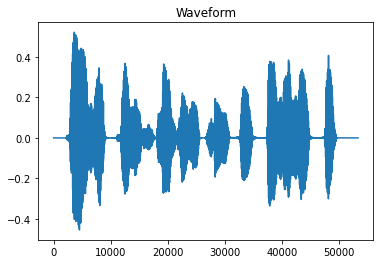

In [7]:
import matplotlib.pyplot as plt
# audio_tensor = tf.cast(audio_tensor, tf.float32) / 32768.0  
plt.figure()
plt.plot(audio_tensor.numpy())
plt.title("Waveform")

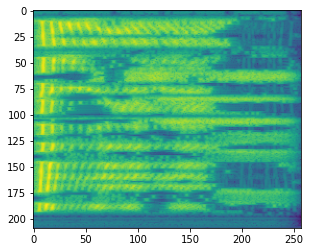

In [8]:
# Convert to spectrogram
spectrogram = tfio.experimental.audio.spectrogram(
    audio_tensor, nfft=512, window=512, stride=256)

plt.figure()
plt.imshow(tf.math.log(spectrogram).numpy())

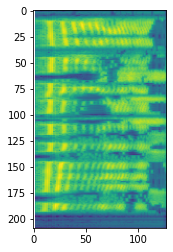

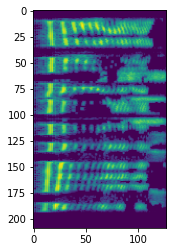

In [9]:
# Convert to mel-spectrogram
mel_spectrogram = tfio.experimental.audio.melscale(
    spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)

plt.figure()
plt.imshow(tf.math.log(mel_spectrogram).numpy())

# Convert to db scale mel-spectrogram
dbscale_mel_spectrogram = tfio.experimental.audio.dbscale(
    mel_spectrogram, top_db=80)

plt.figure()
plt.imshow(dbscale_mel_spectrogram.numpy())